# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [37]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [38]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0  04 FG04-A1-4-start-rep1-mightbetoohot.txt           0.0    104.583536   
1  05 FG04-A1-4-start-rep2-mightbetoohot.txt           0.0    104.561540   
2  06 FG04-A1-4-start-rep3-mightbetoohot.txt           0.0    104.583536   
3                  43 FG04-A1-4-end-rep4.txt           0.0    104.556040   
4      44 FG04-A1-4-end-rep5_CRR_DiadFit.txt           1.0    104.583536   
5                  45 FG04-A1-4-end-rep6.txt           0.0    104.594535   

     Diad1_pos    Diad2_pos  HB1_pos      HB2_pos  C13_pos  Diad1_abs_prom  \
0  1283.031111  1387.614648      NaN  1408.775519      NaN      448.341614   
1  1283.053108  1387.614648      NaN  1409.319938      NaN      408.579056   
2  1283.042110  1387.625646      NaN  1409.429922      NaN      450.354257   
3  1282.877134  1387.433175      NaN          NaN      NaN      362.701351   
4  1282.844139  1387.427675      NaN          NaN      NaN      329.015655   
5  1282.849638  1387.444173      NaN          NaN      NaN      339.210702   

   Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  HB1_height  \
0      898.562686  ...  729.225856         NaN   1135.241608         NaN   
1      806.220925  ...  723.758236         NaN   1093.879044         NaN   
2      888.493761  ...  723.425502         NaN   1133.354257         NaN   
3      738.948939  ...         NaN         NaN   1042.801357         NaN   
4      689.994549  ...         NaN         NaN   1006.715667         NaN   
5      653.304233  ...         NaN         NaN   1015.510690         NaN   

   Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0        686.899994        687.550003                     NaN   
1        685.299988        685.799988                     NaN   
2        683.000000        683.500000                     NaN   
3        680.100006        680.749985                     NaN   
4        677.700012        678.150009                     NaN   
5        676.299988        676.799988                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.006977                        NaN                  25.365377  
1               1.007576                        NaN                  25.588656  
2               1.011114                        NaN                  24.364298  
3                    NaN                        NaN                        NaN  
4                    NaN                        NaN                        NaN  
5                    NaN                        NaN                        NaN  

[6 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [39]:
Diad_Files =GroupN_df['filename']
i=4


### Lets plot the diad to have a look at it

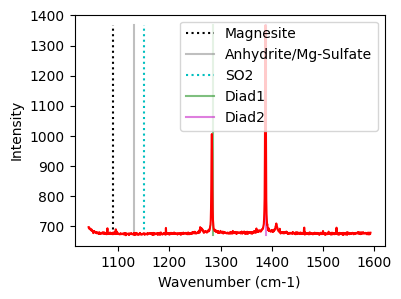

In [40]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [41]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [42]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=329.015655135845, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1283.079621       1283.079621        0.007454       1272.935618   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0            0.96612                  0             452.618037   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        3.890614        0.833473     1.93224  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.136531      1.069009                   0.263811   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.004269  PseudoVoigtModel

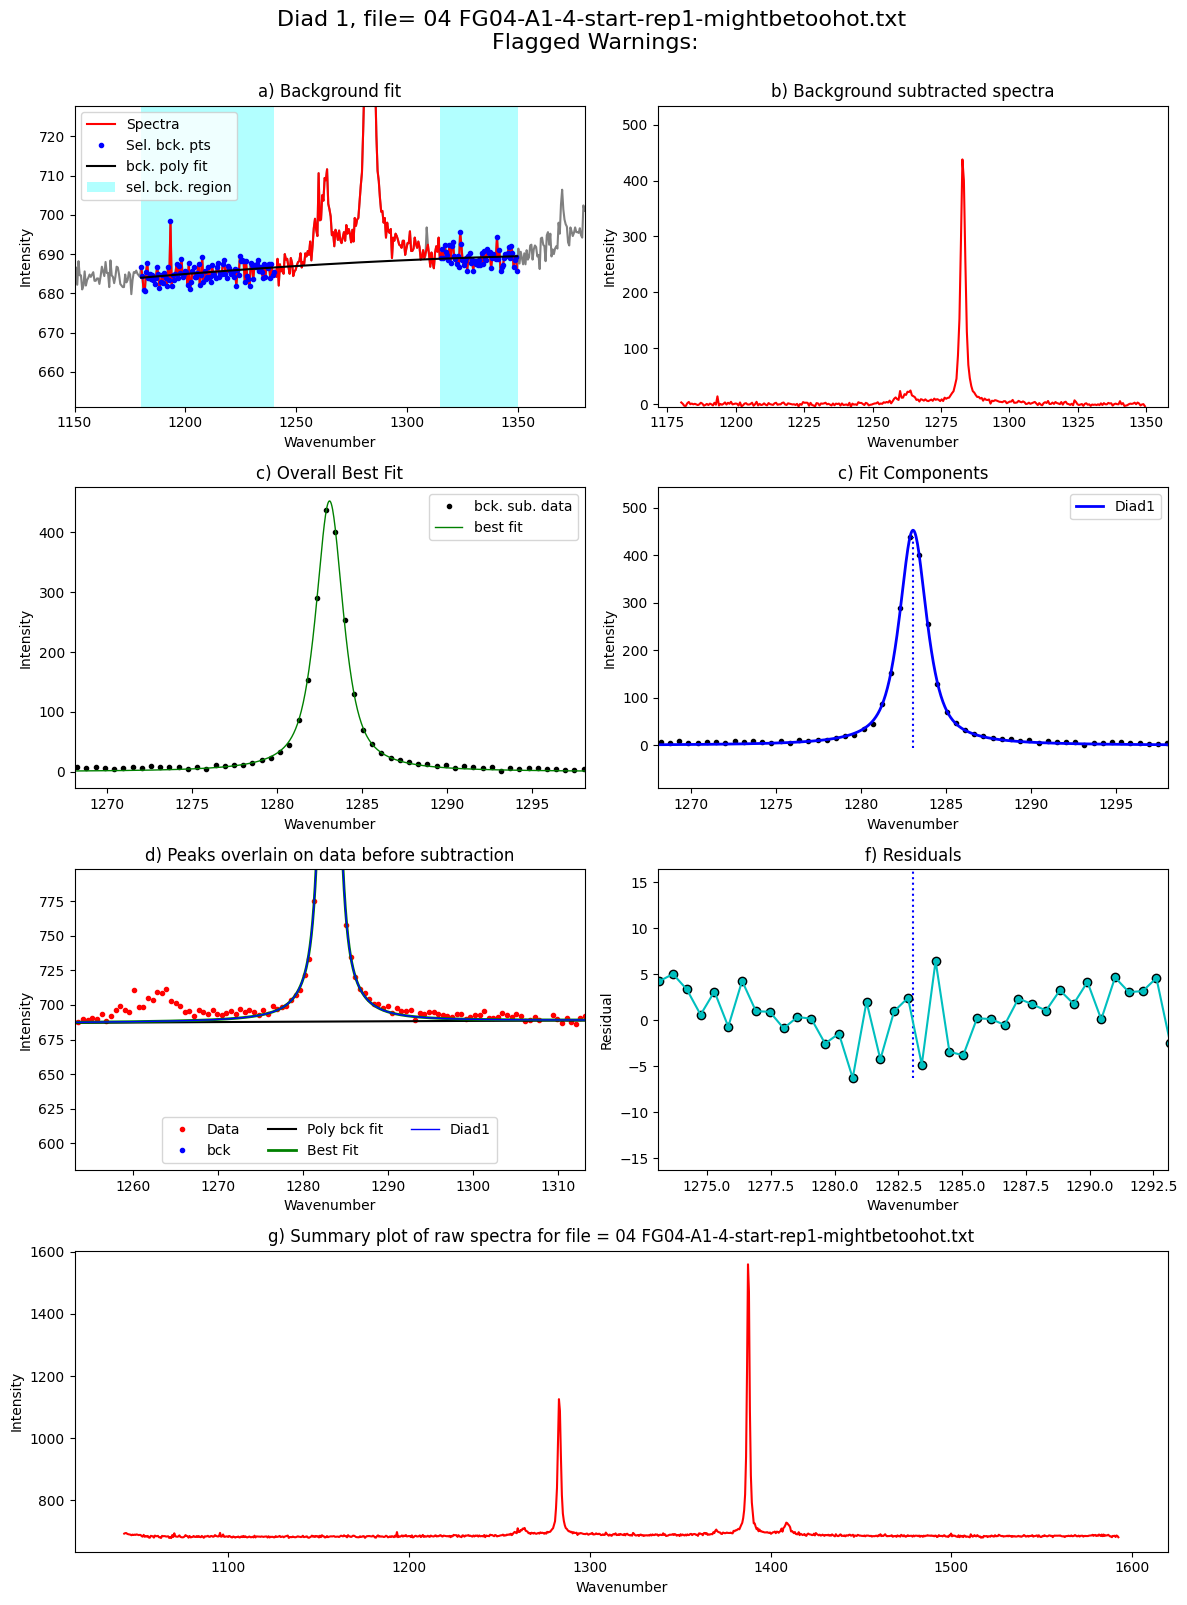

In [43]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [44]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [45]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=nan, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=689.9945490994019, HB_prom=nan, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.415519       1387.415519        0.005323       1611.539077   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.811816                  0             690.977921   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  \
0        3.566632         0.80337    1.623631  Flagged Warnings:   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.035565      1.007246                   0.057744   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0               0.00235  PseudoVoigtModel

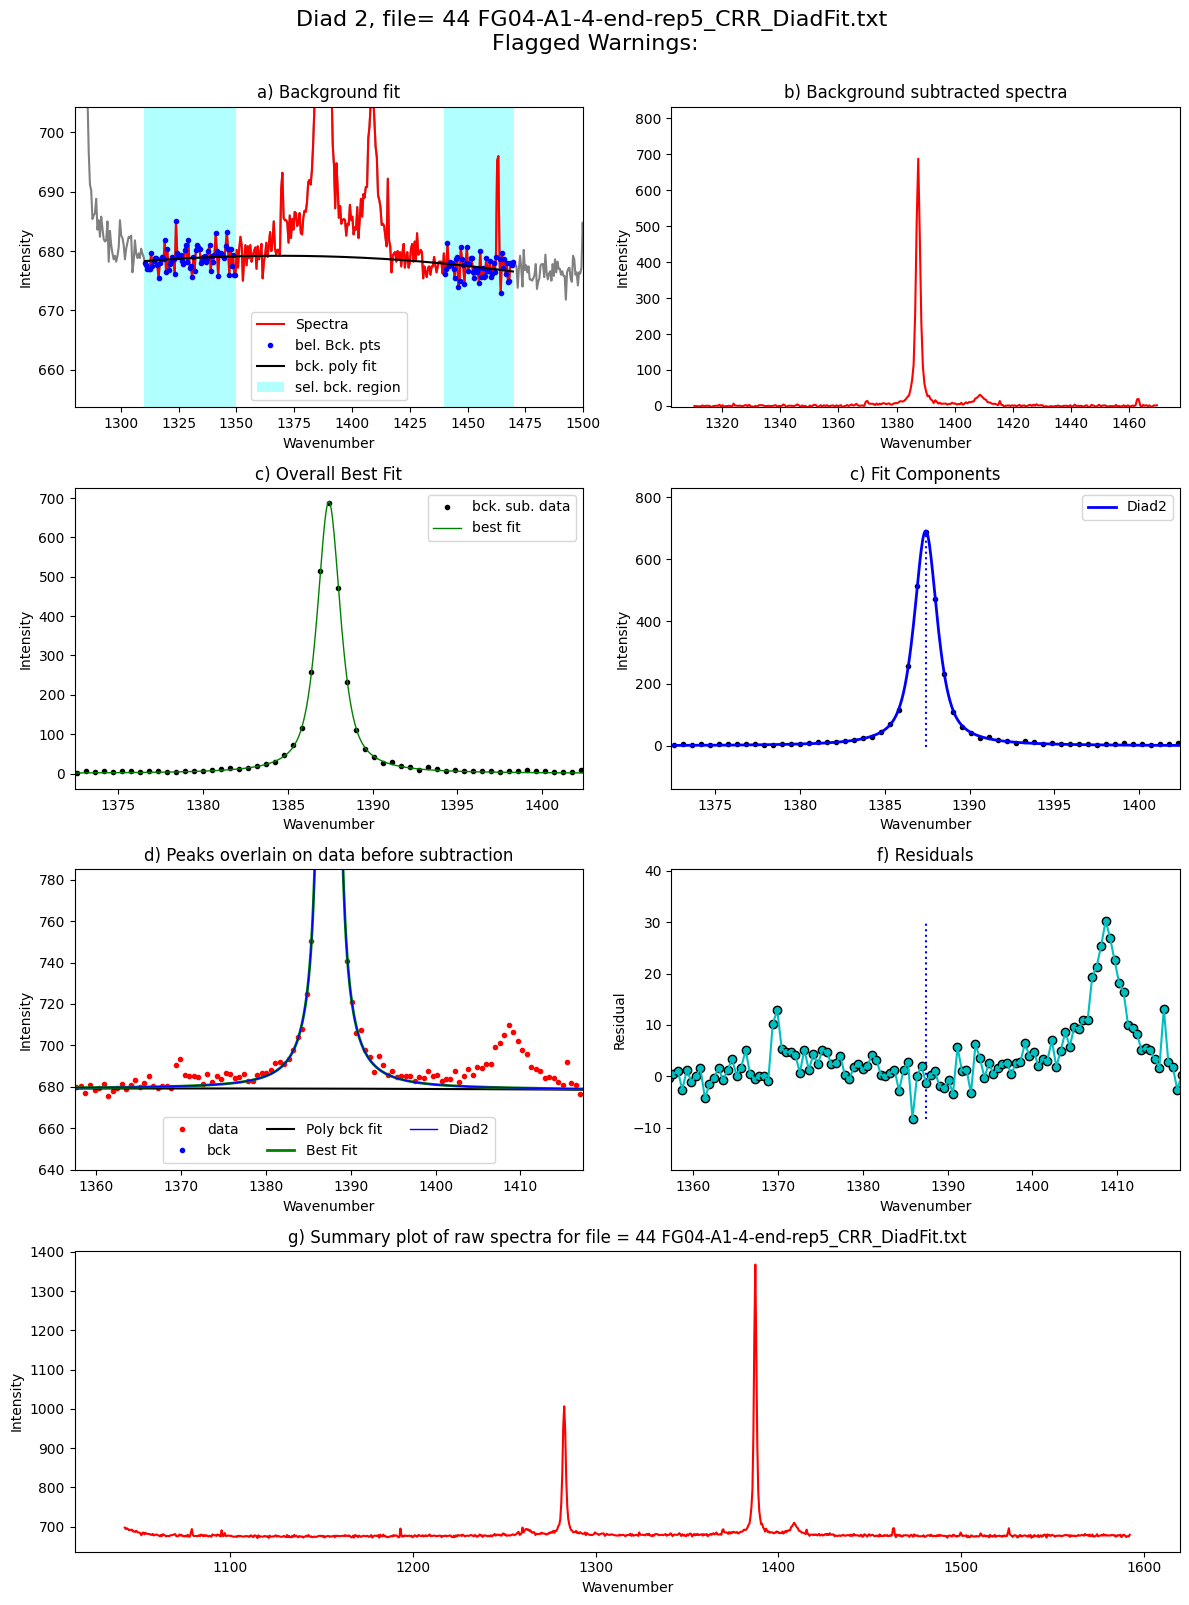

In [46]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/6 [00:00<?, ?it/s]

Processing file: 04 FG04-A1-4-start-rep1-mightbetoohot.txt


 17%|█▋        | 1/6 [00:04<00:22,  4.45s/it]

Processing file: 05 FG04-A1-4-start-rep2-mightbetoohot.txt


 33%|███▎      | 2/6 [00:08<00:15,  3.93s/it]

Processing file: 06 FG04-A1-4-start-rep3-mightbetoohot.txt


 50%|█████     | 3/6 [00:11<00:10,  3.54s/it]

Processing file: 43 FG04-A1-4-end-rep4.txt


 67%|██████▋   | 4/6 [00:13<00:06,  3.24s/it]

Processing file: 44 FG04-A1-4-end-rep5_CRR_DiadFit.txt


 83%|████████▎ | 5/6 [00:16<00:03,  3.05s/it]

Processing file: 45 FG04-A1-4-end-rep6.txt


100%|██████████| 6/6 [00:19<00:00,  3.23s/it]


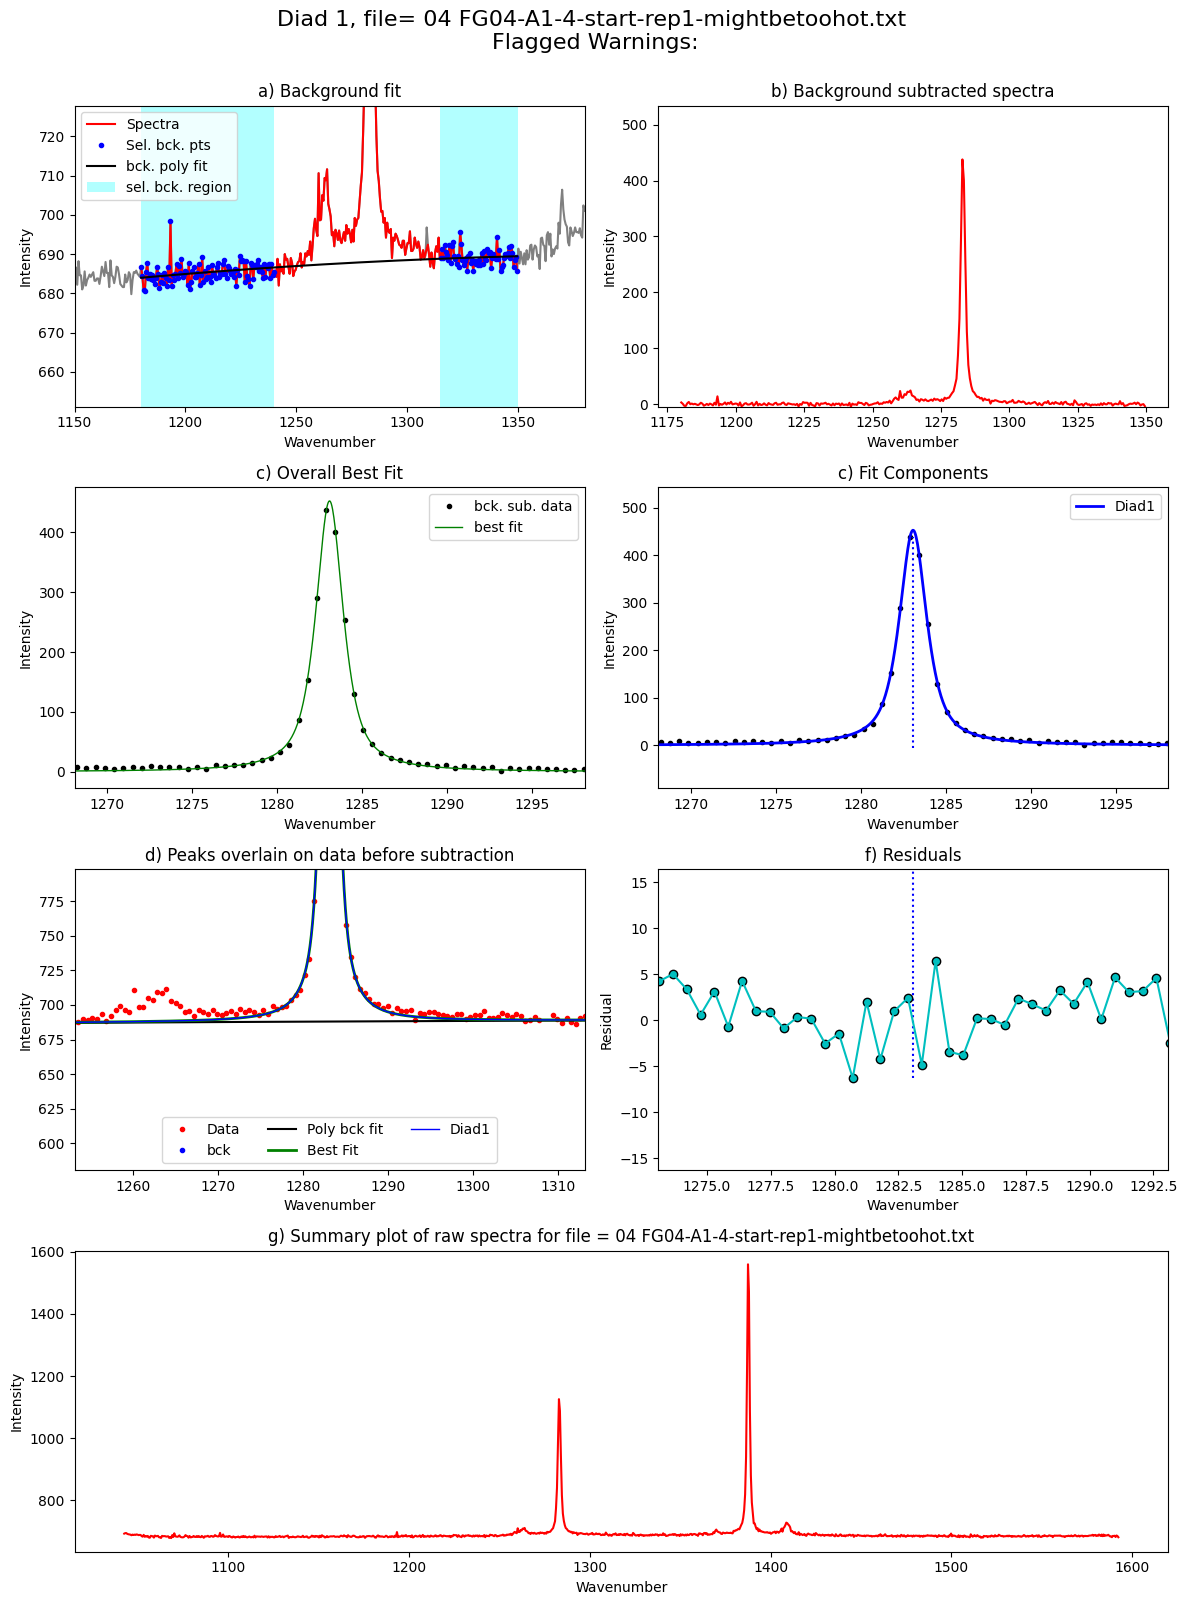

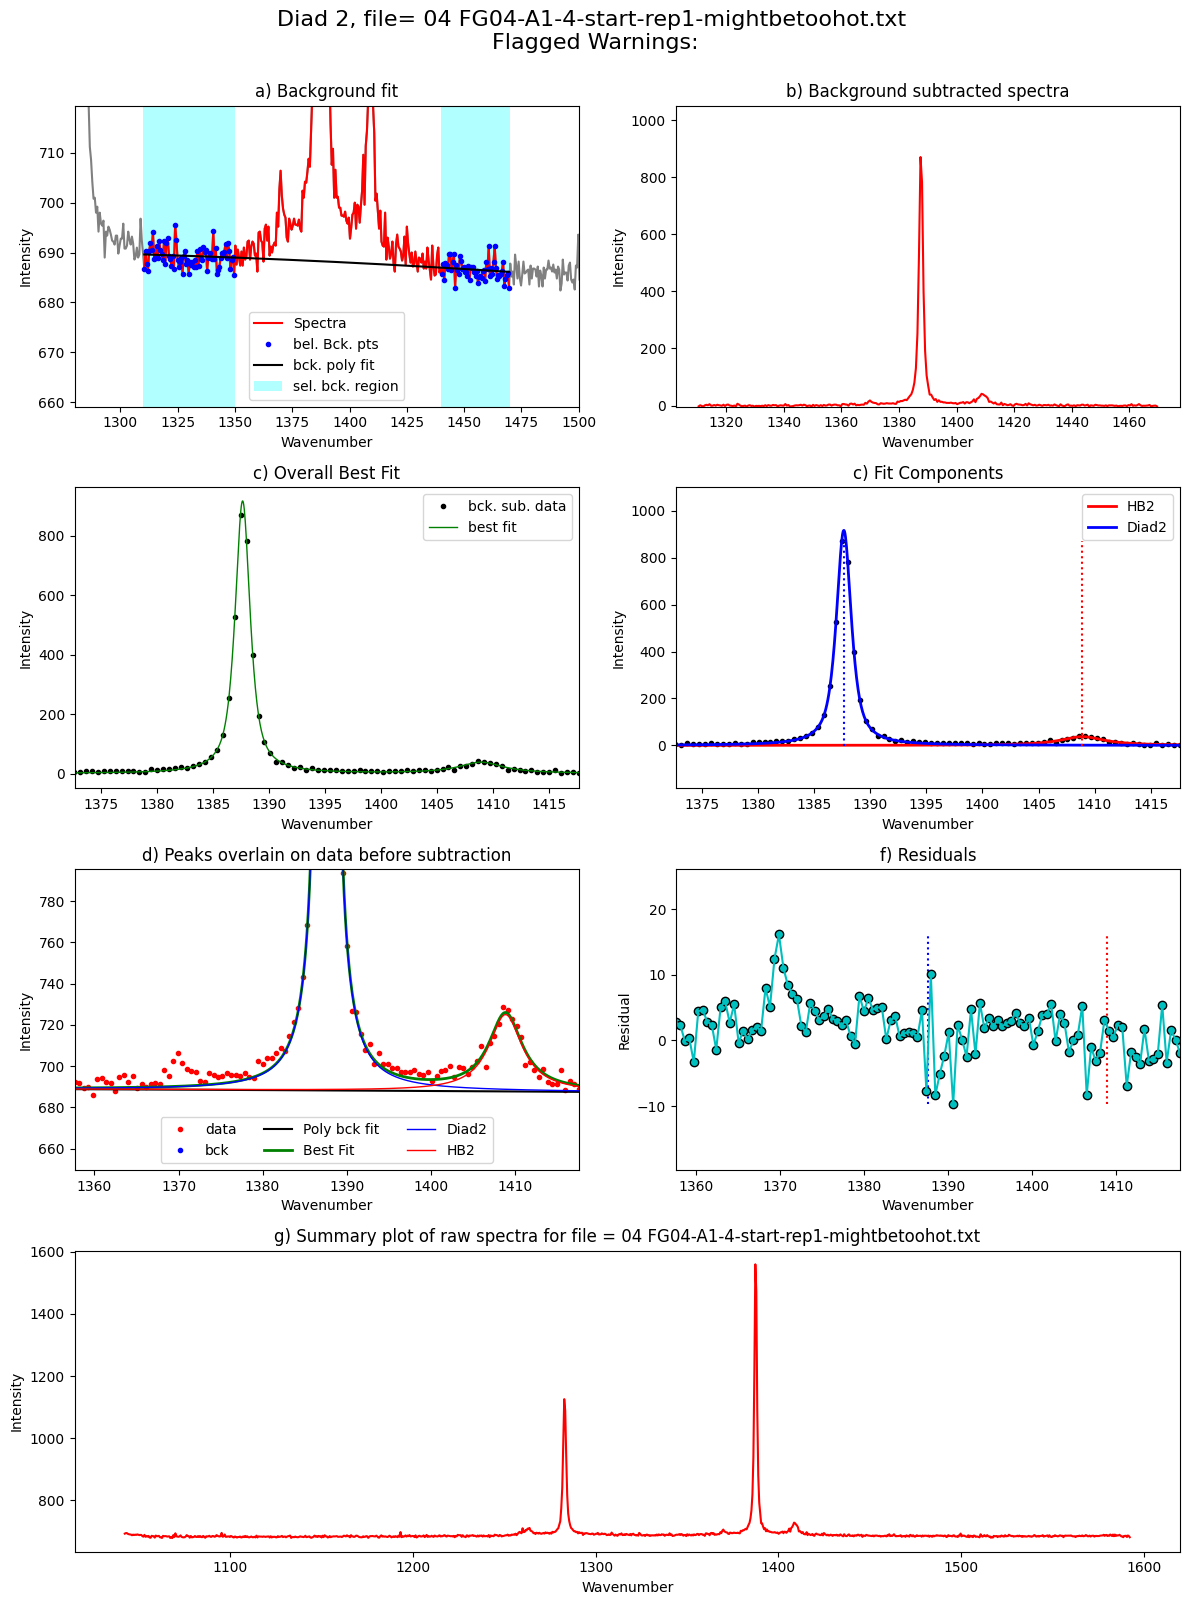

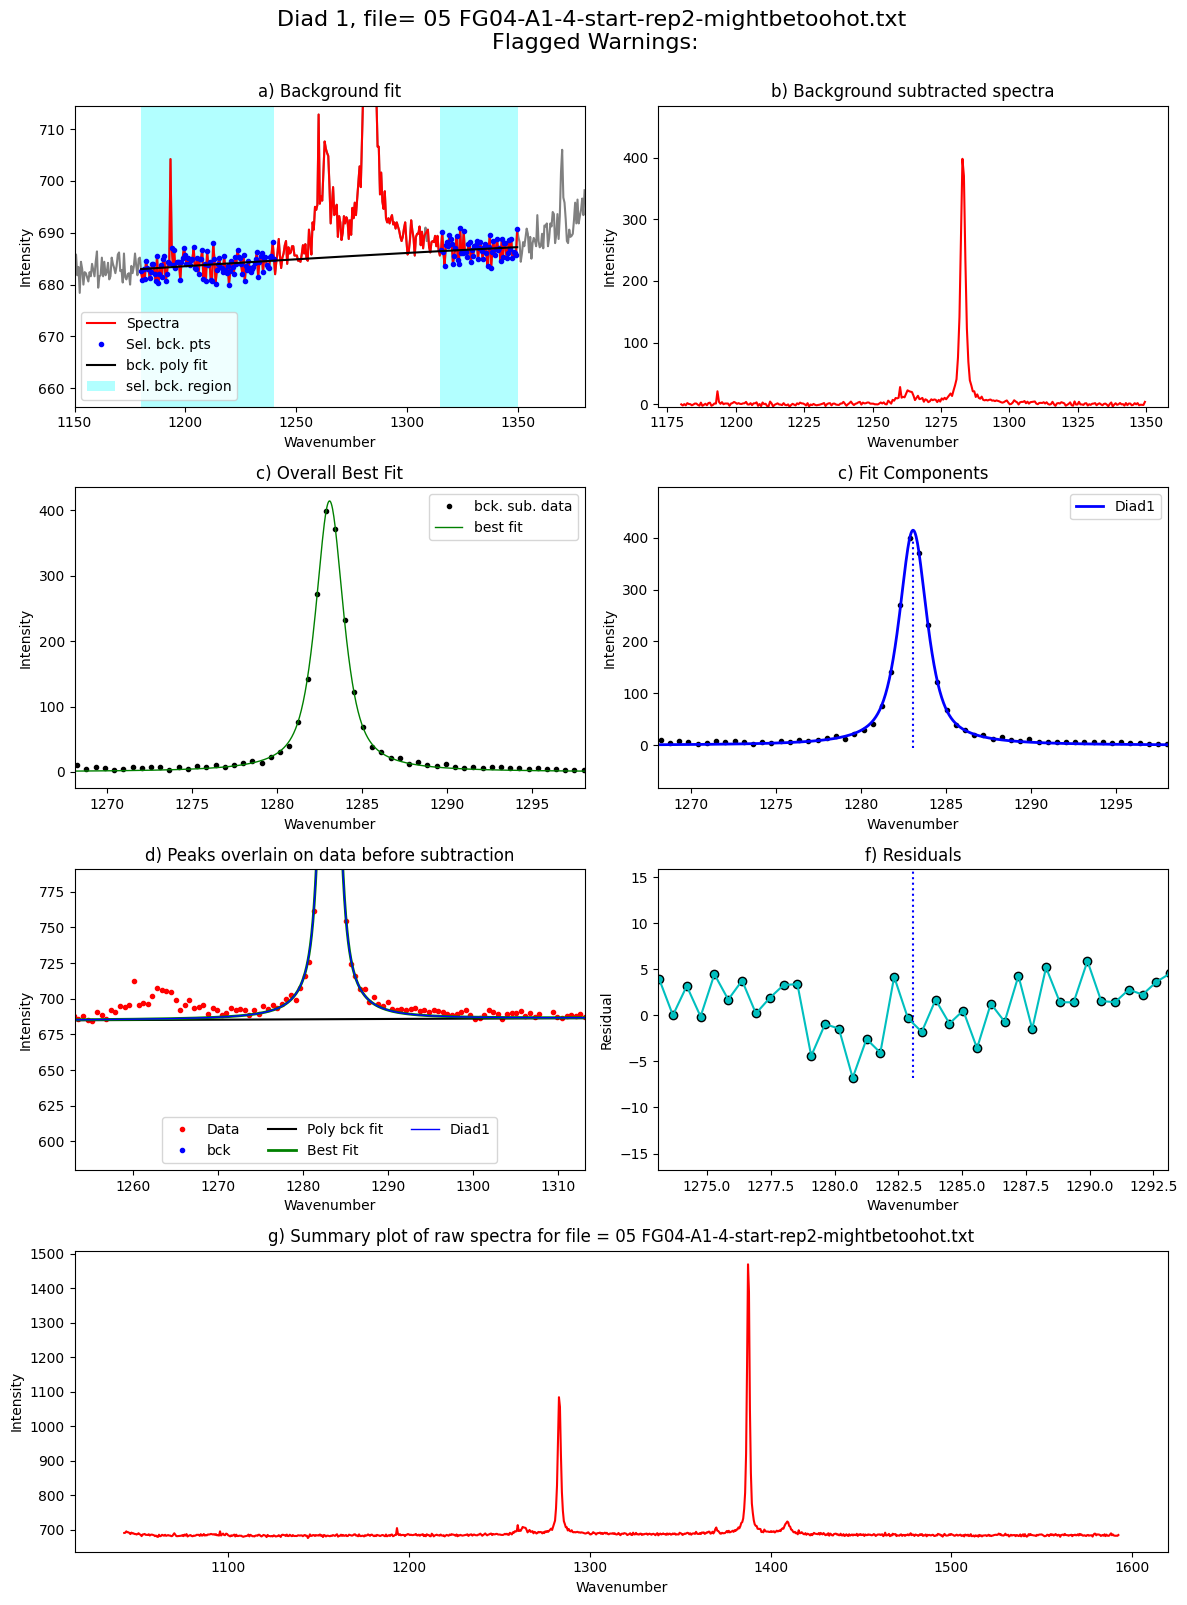

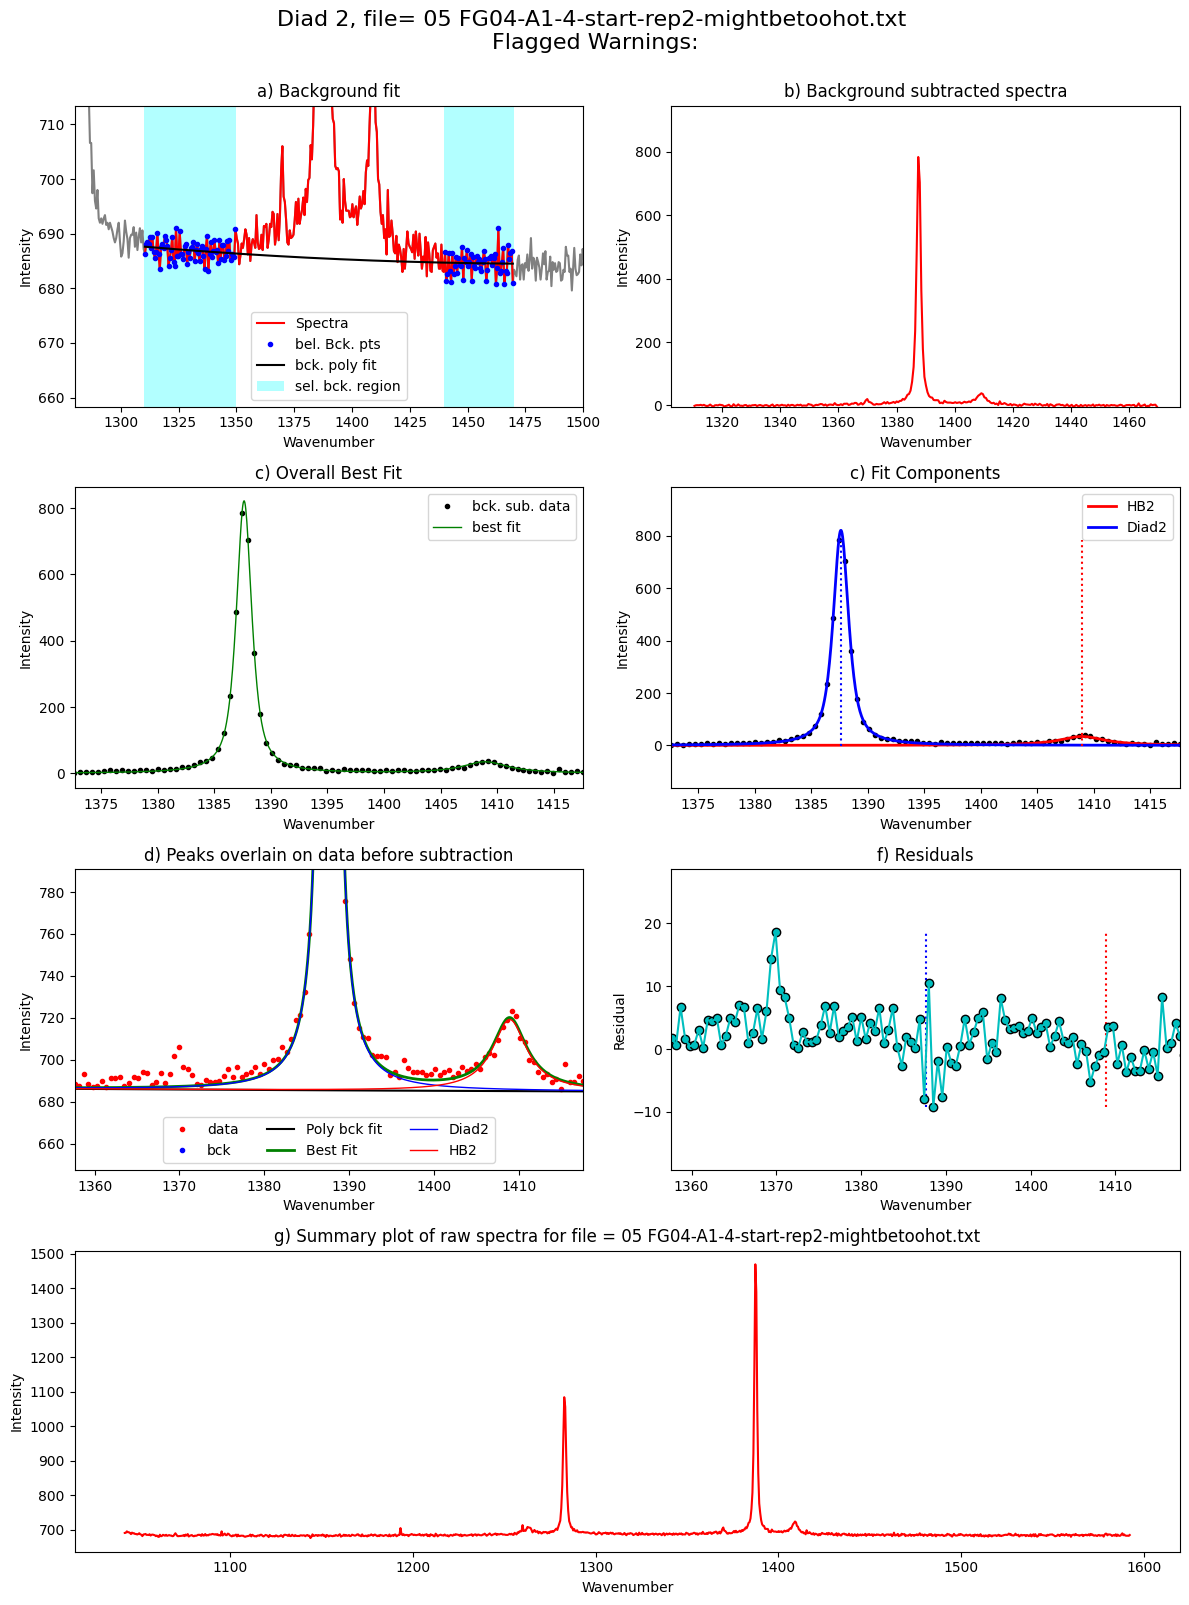

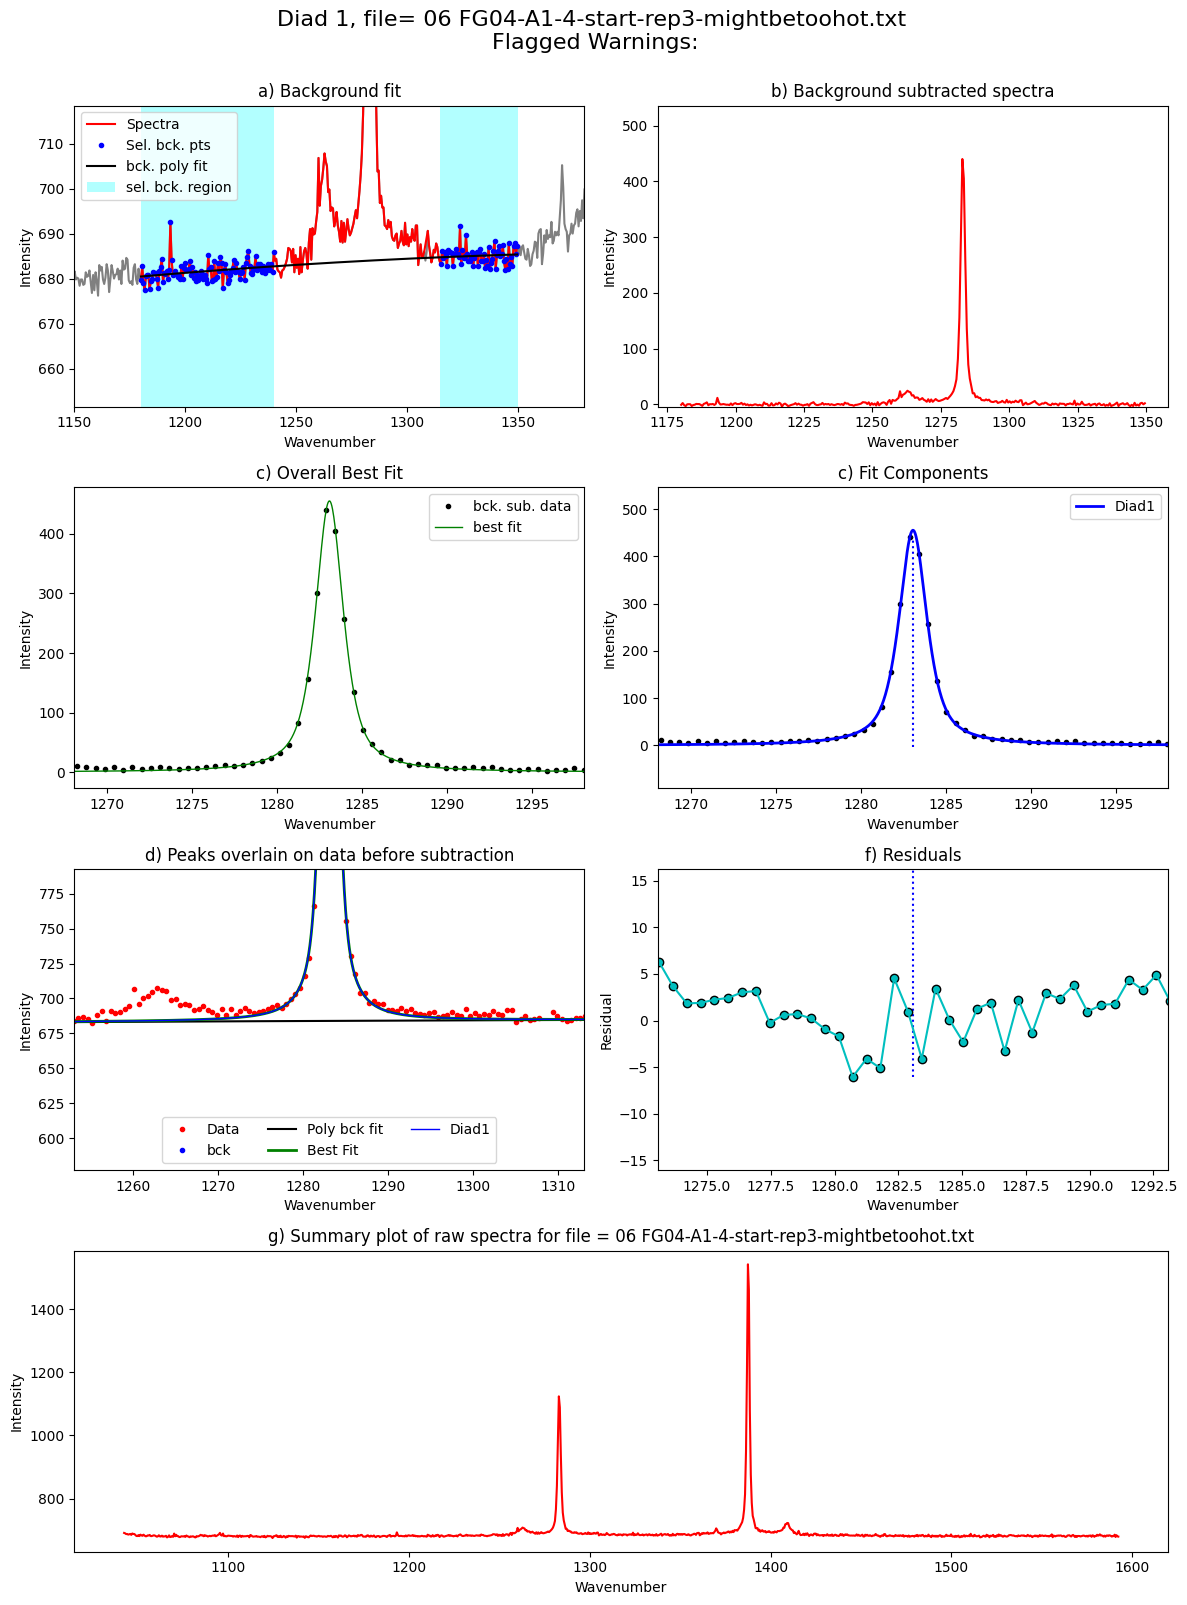

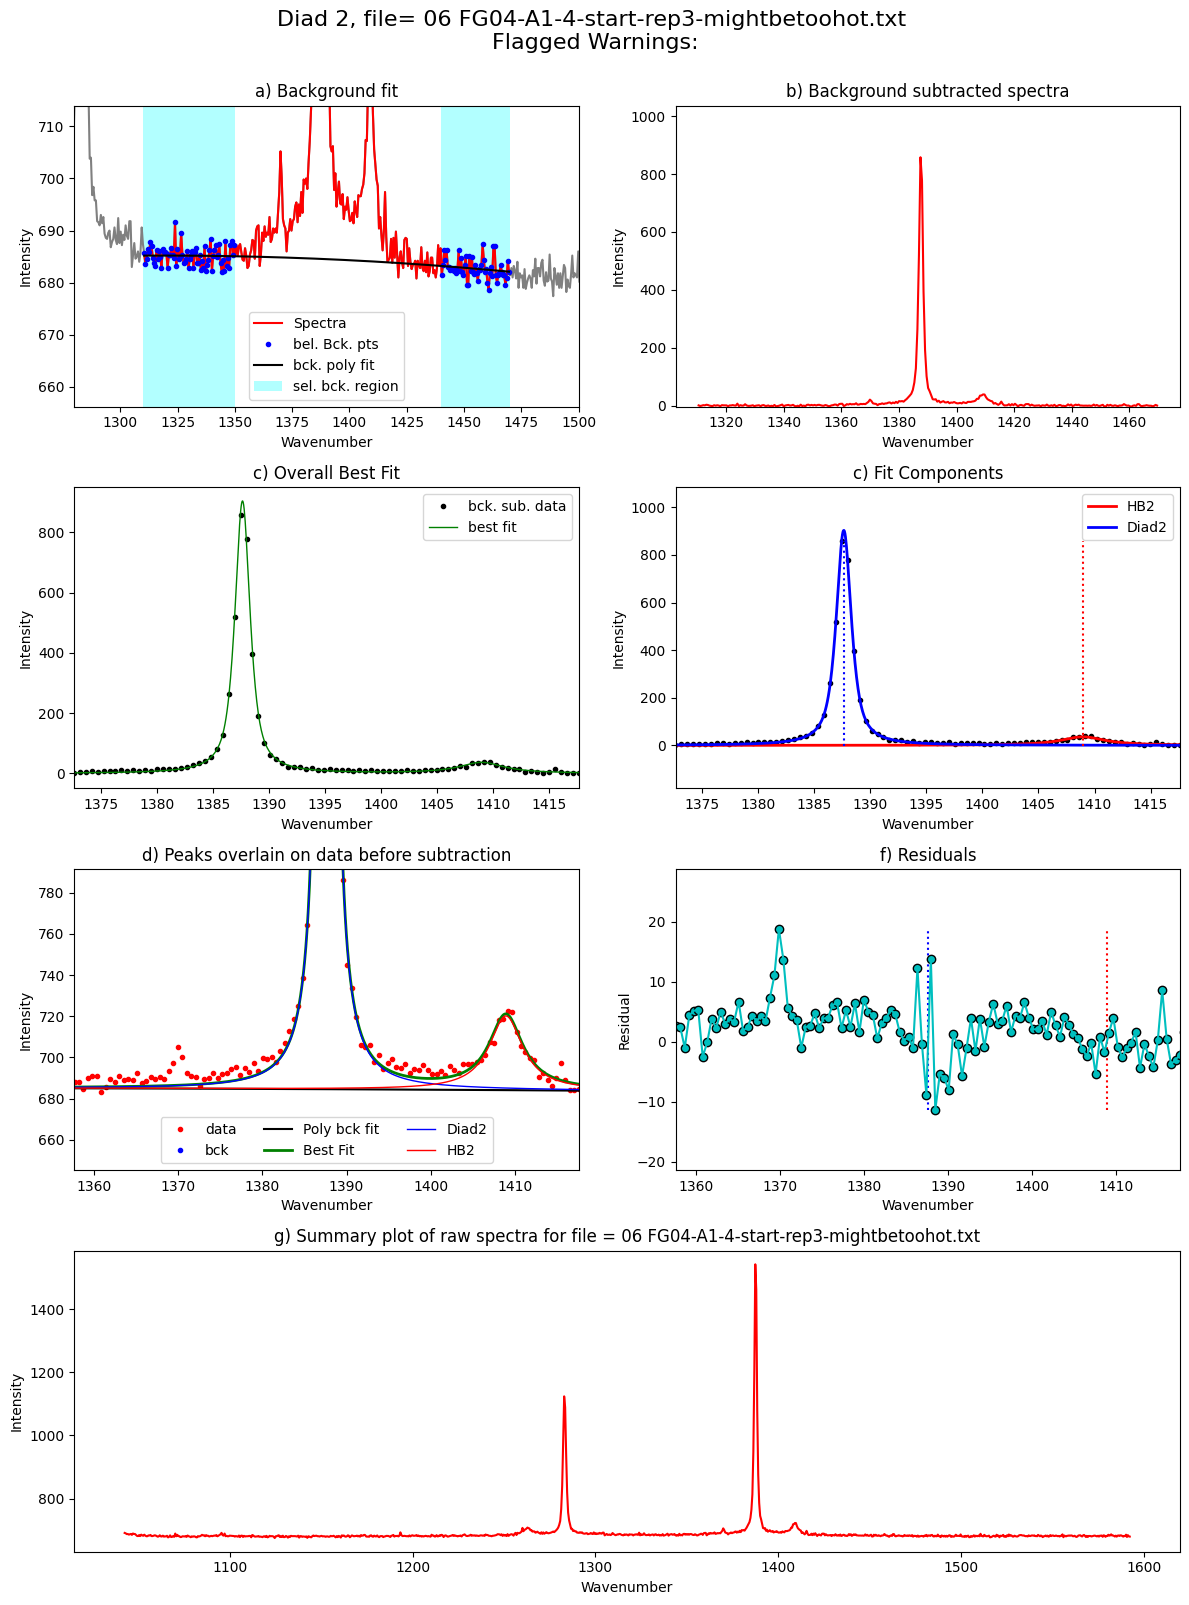

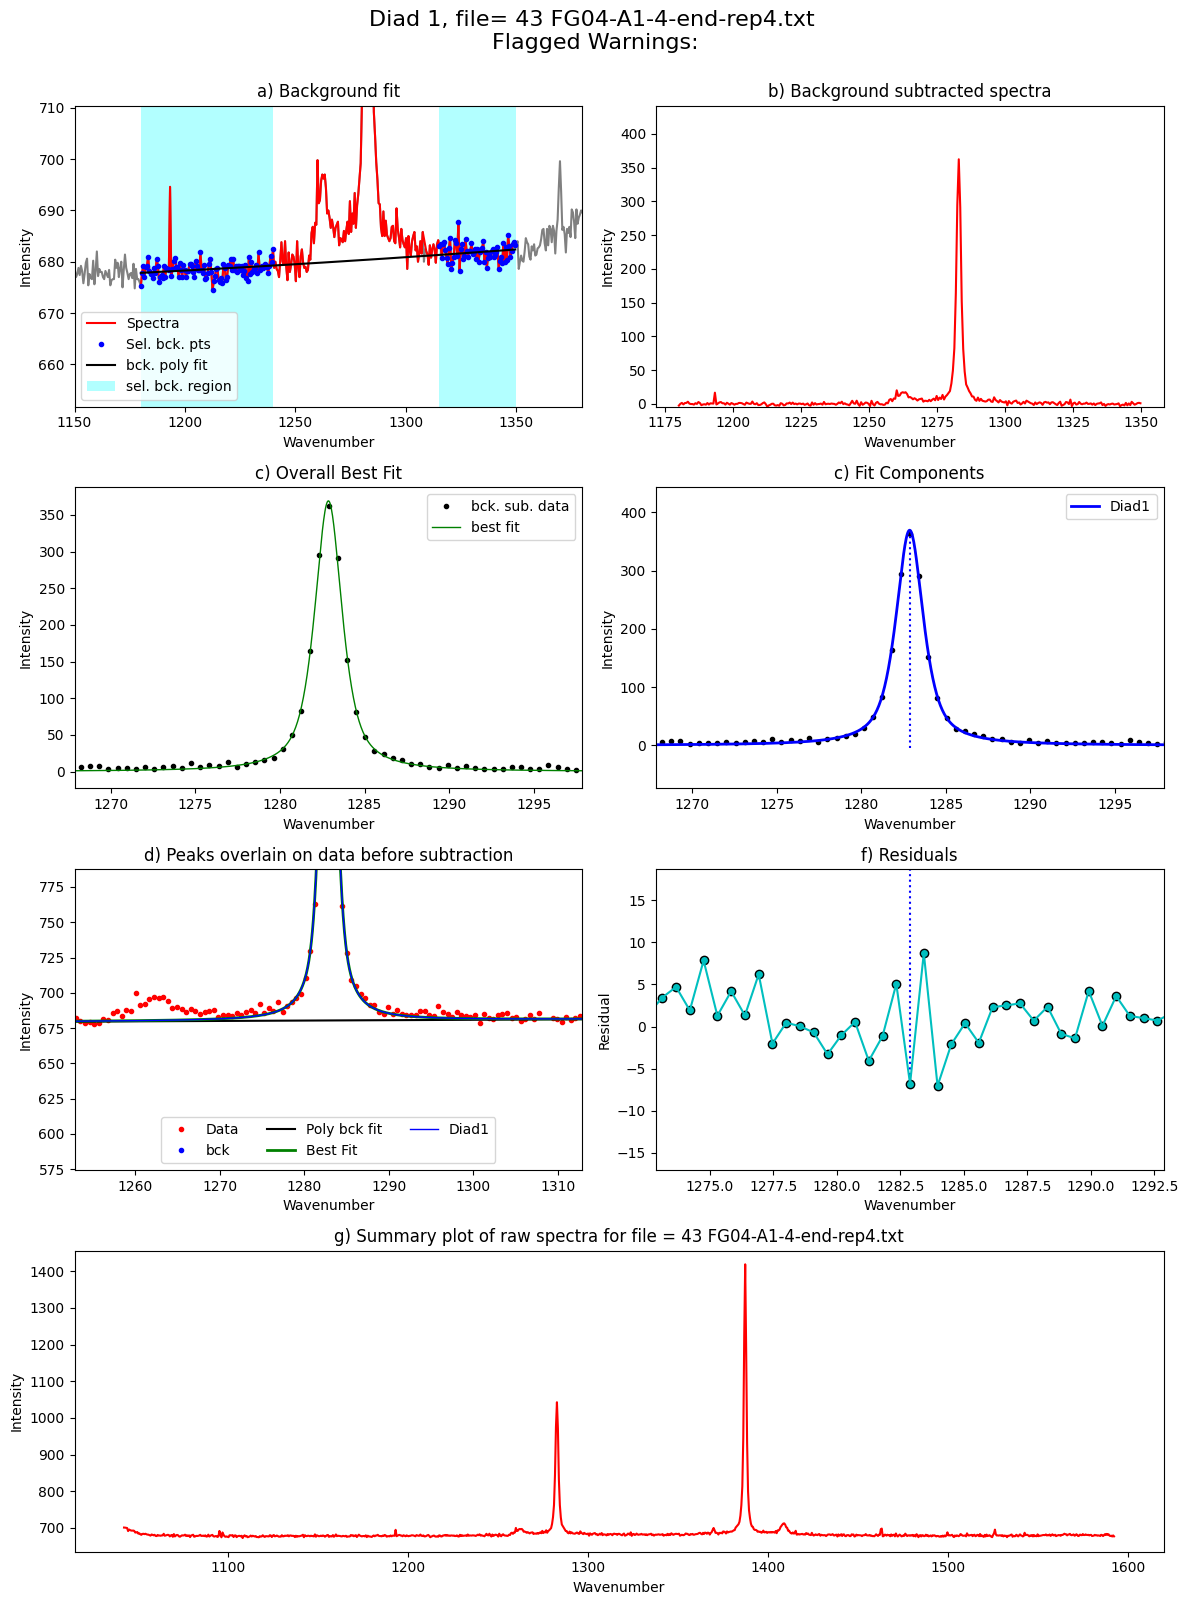

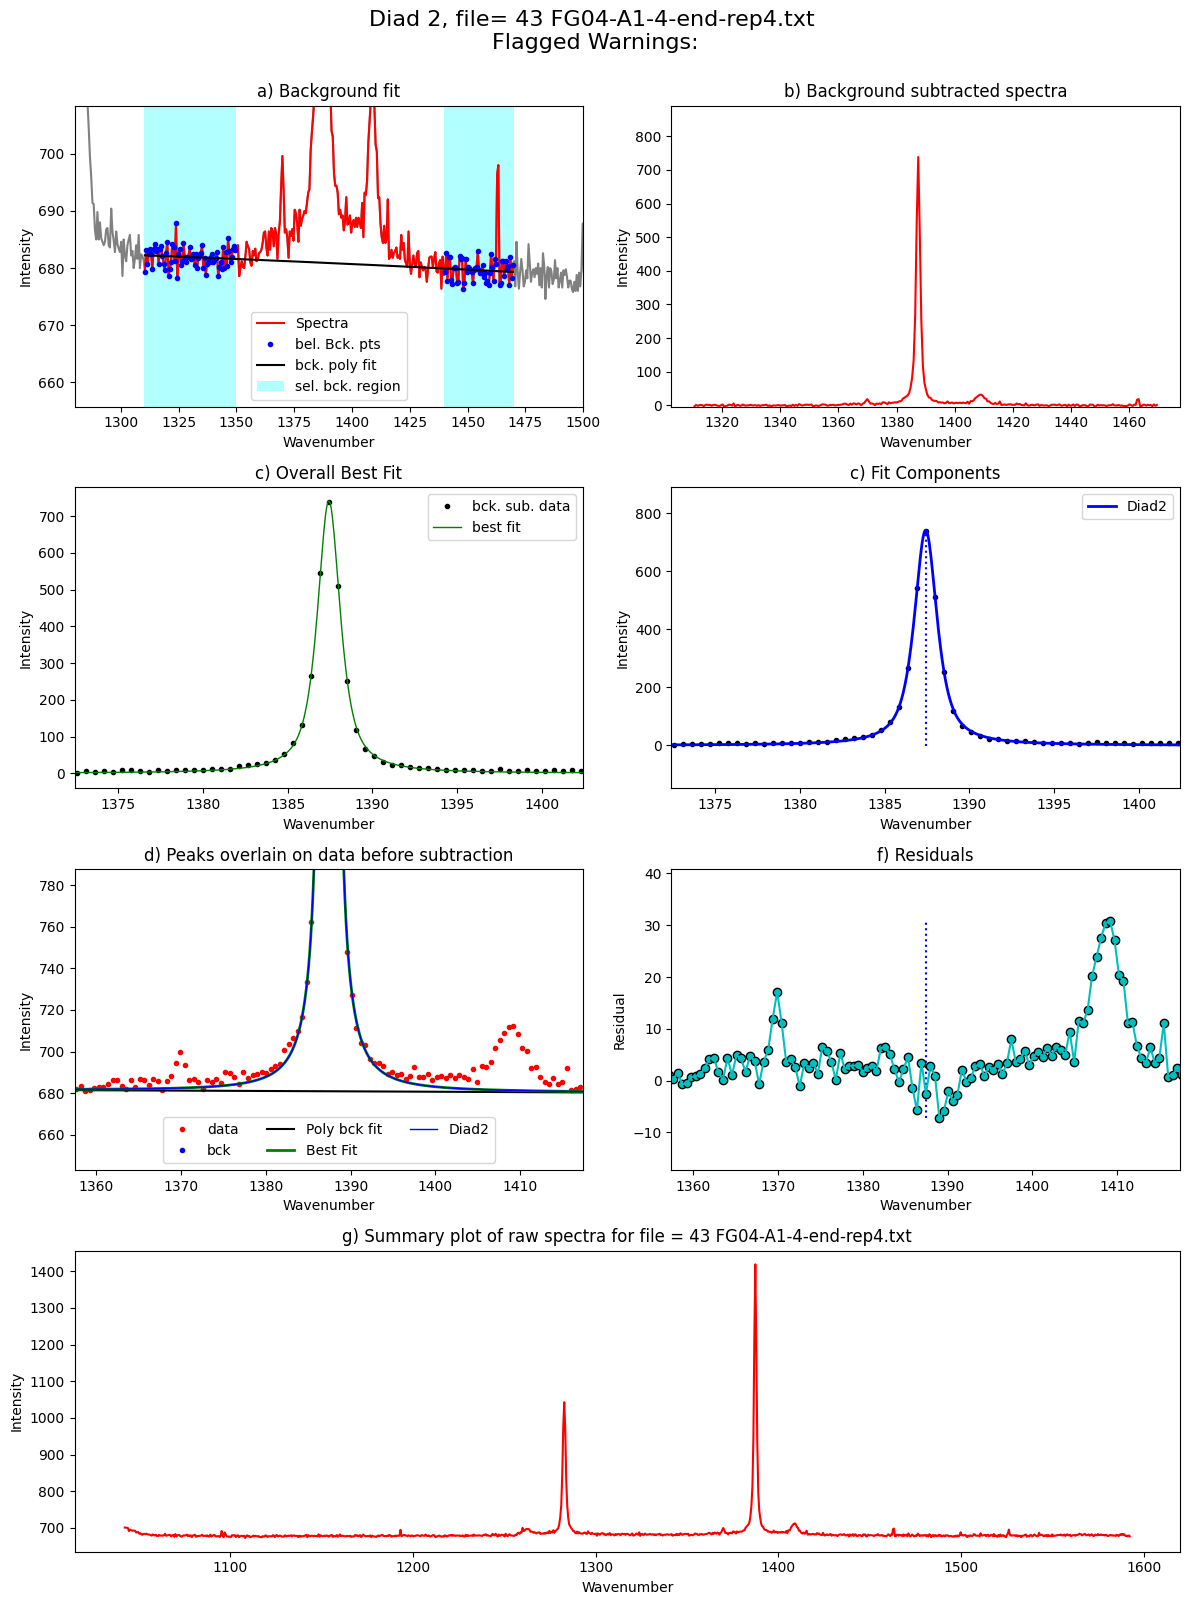

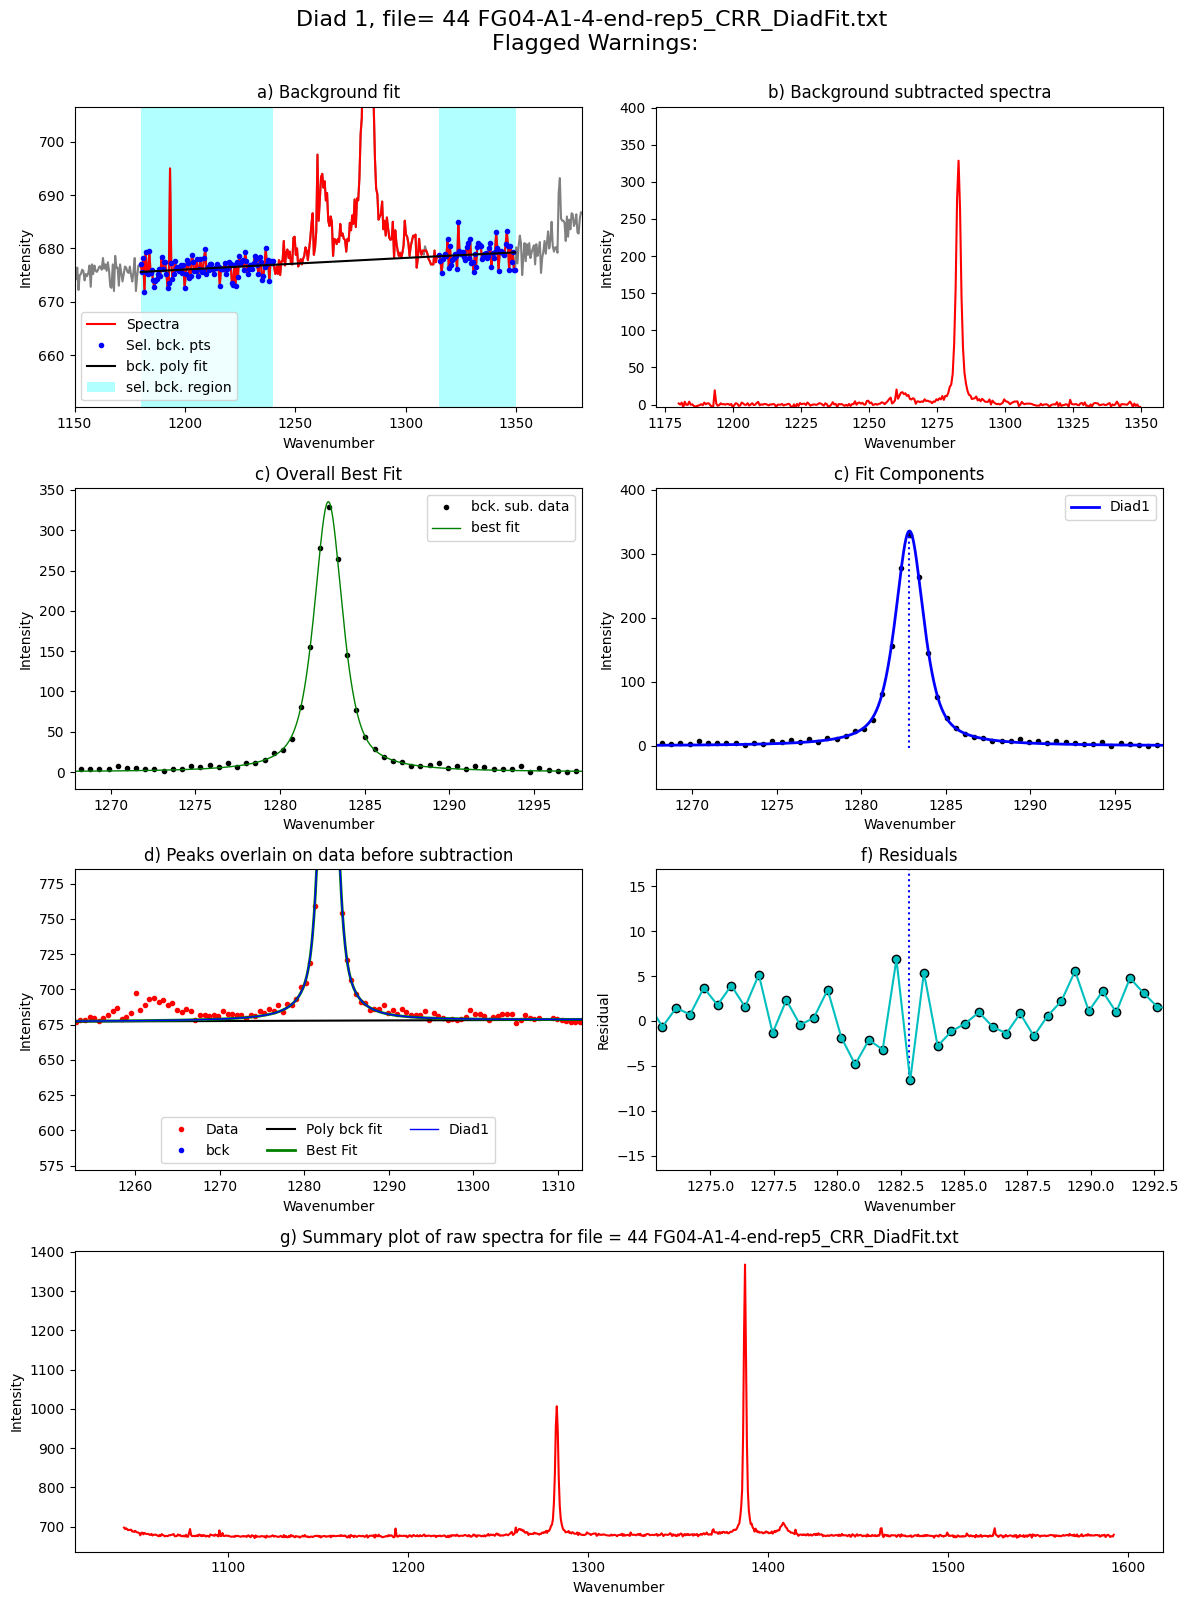

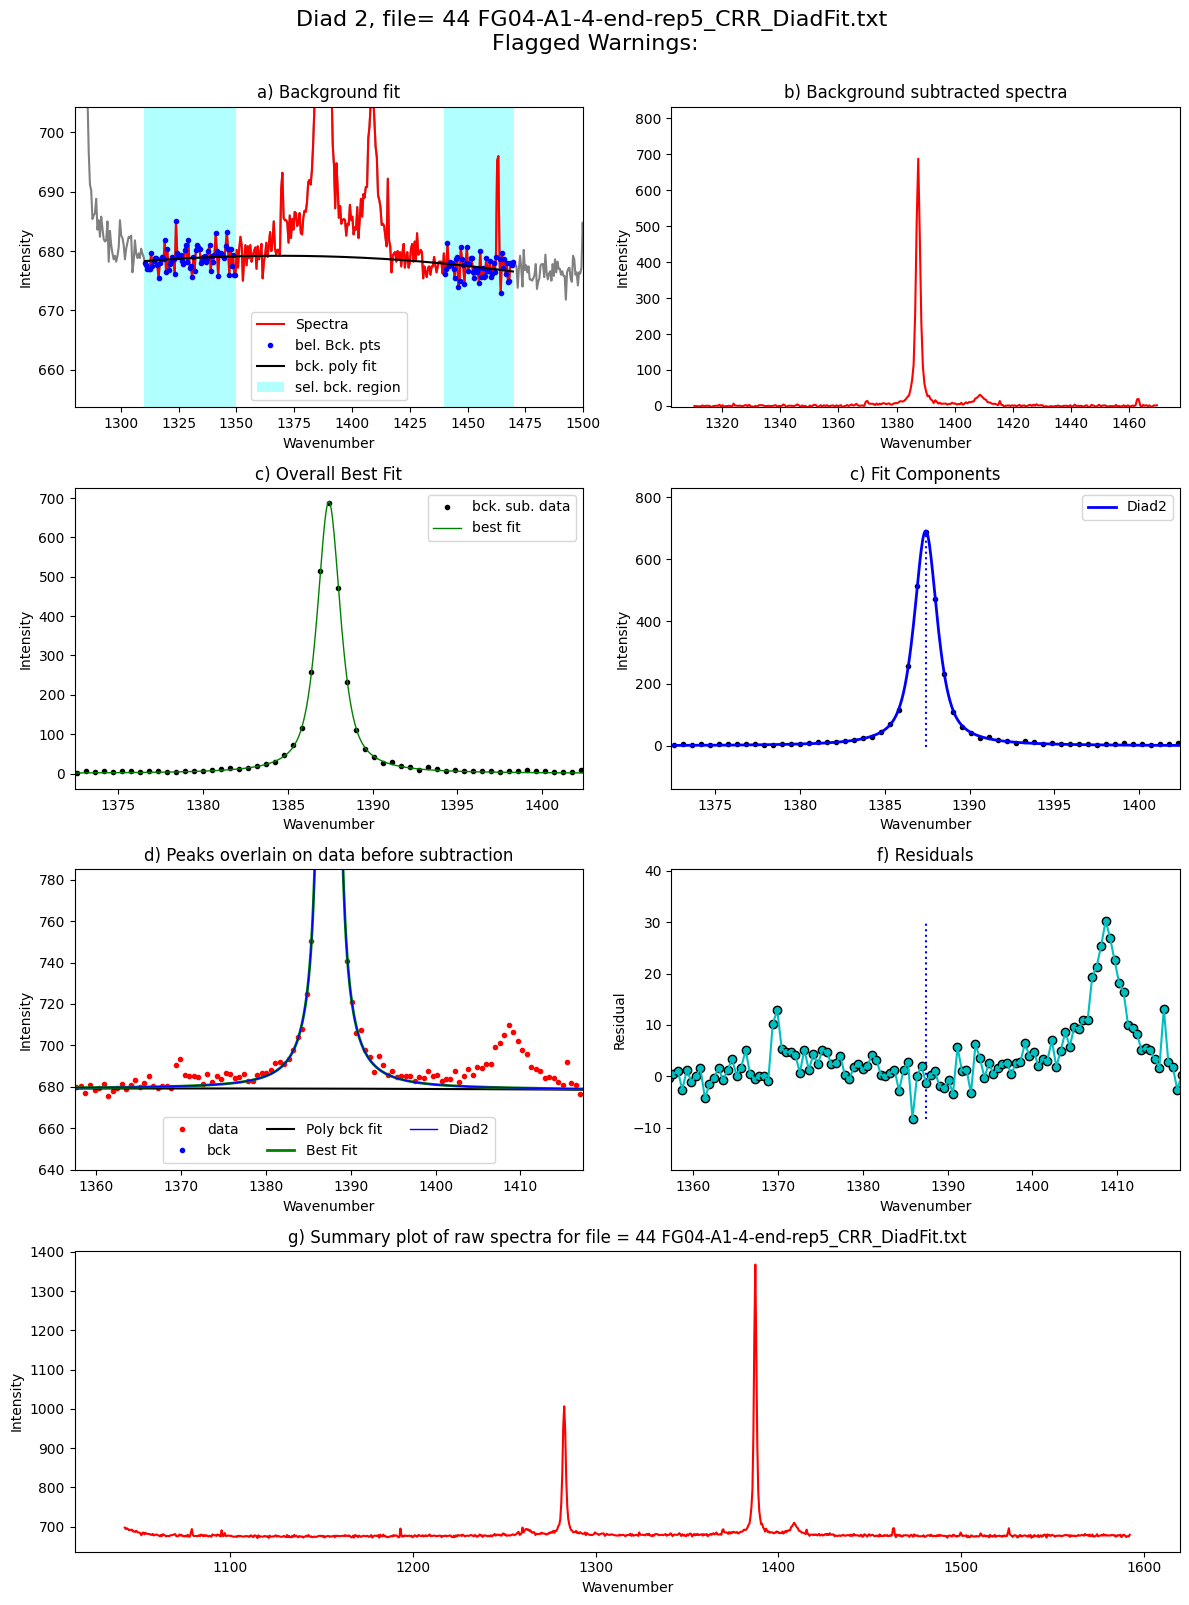

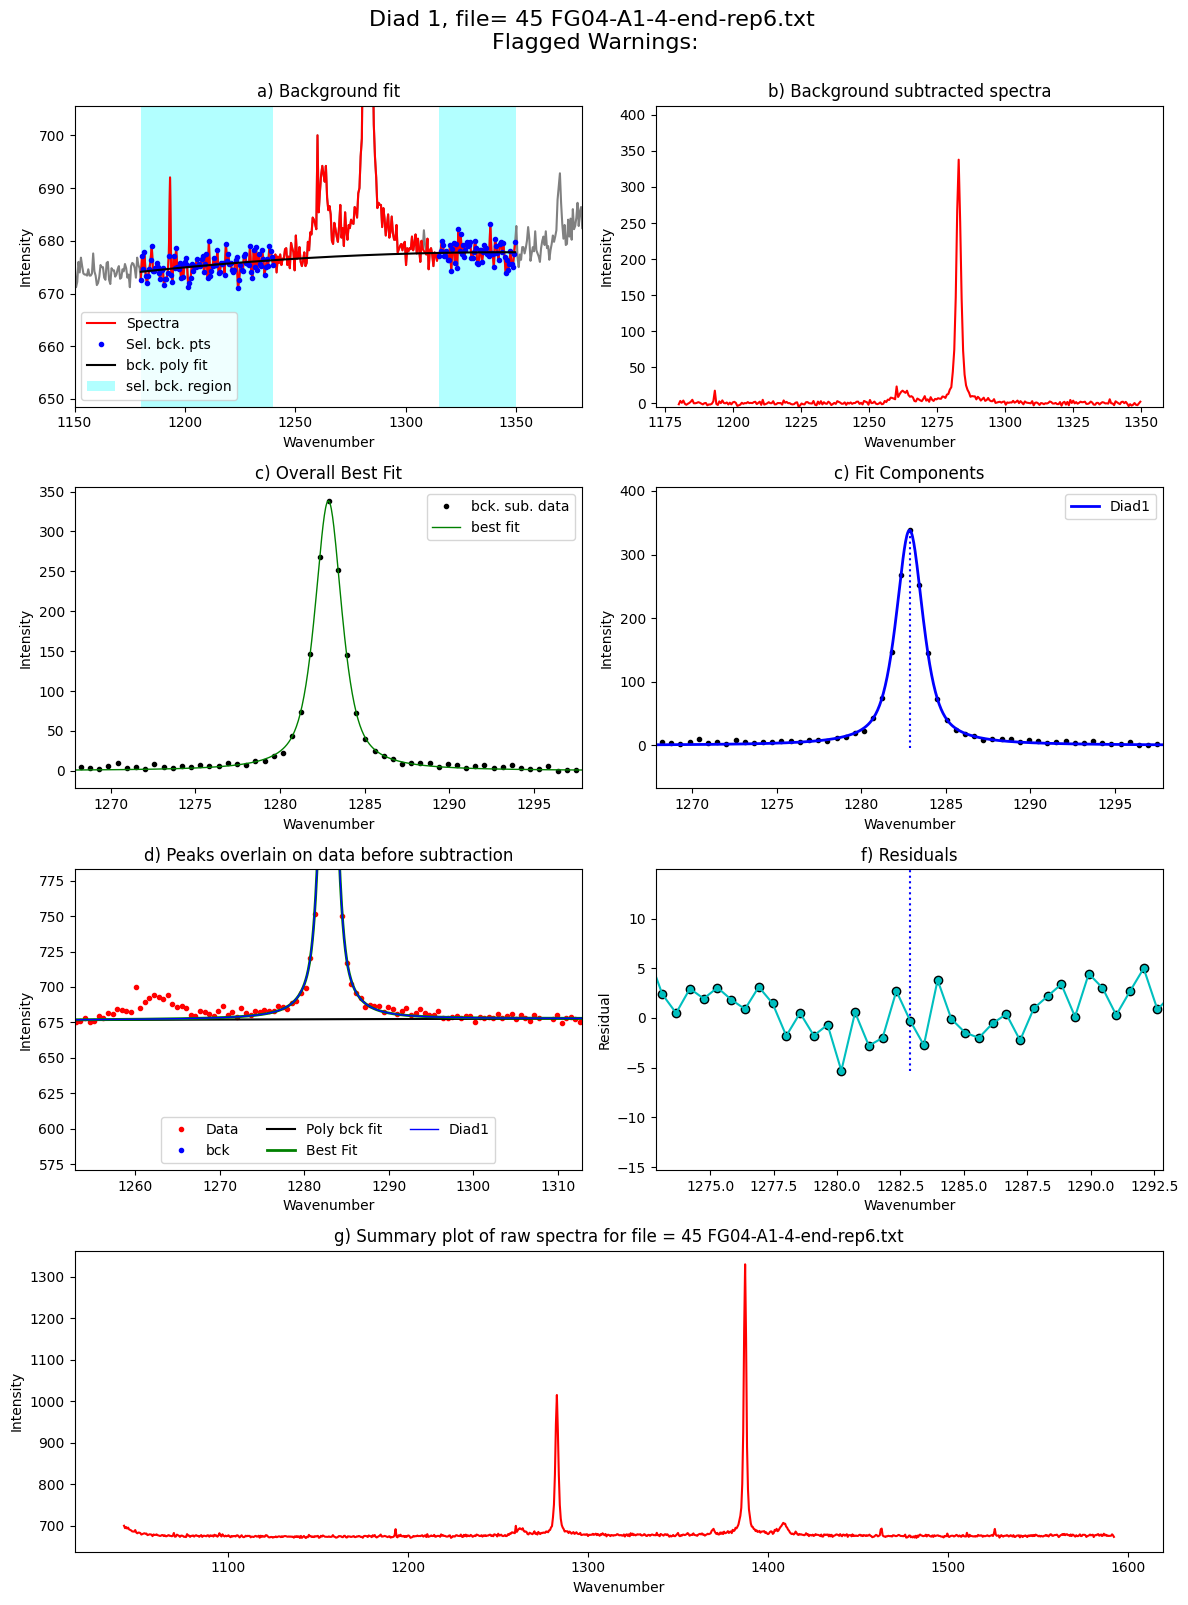

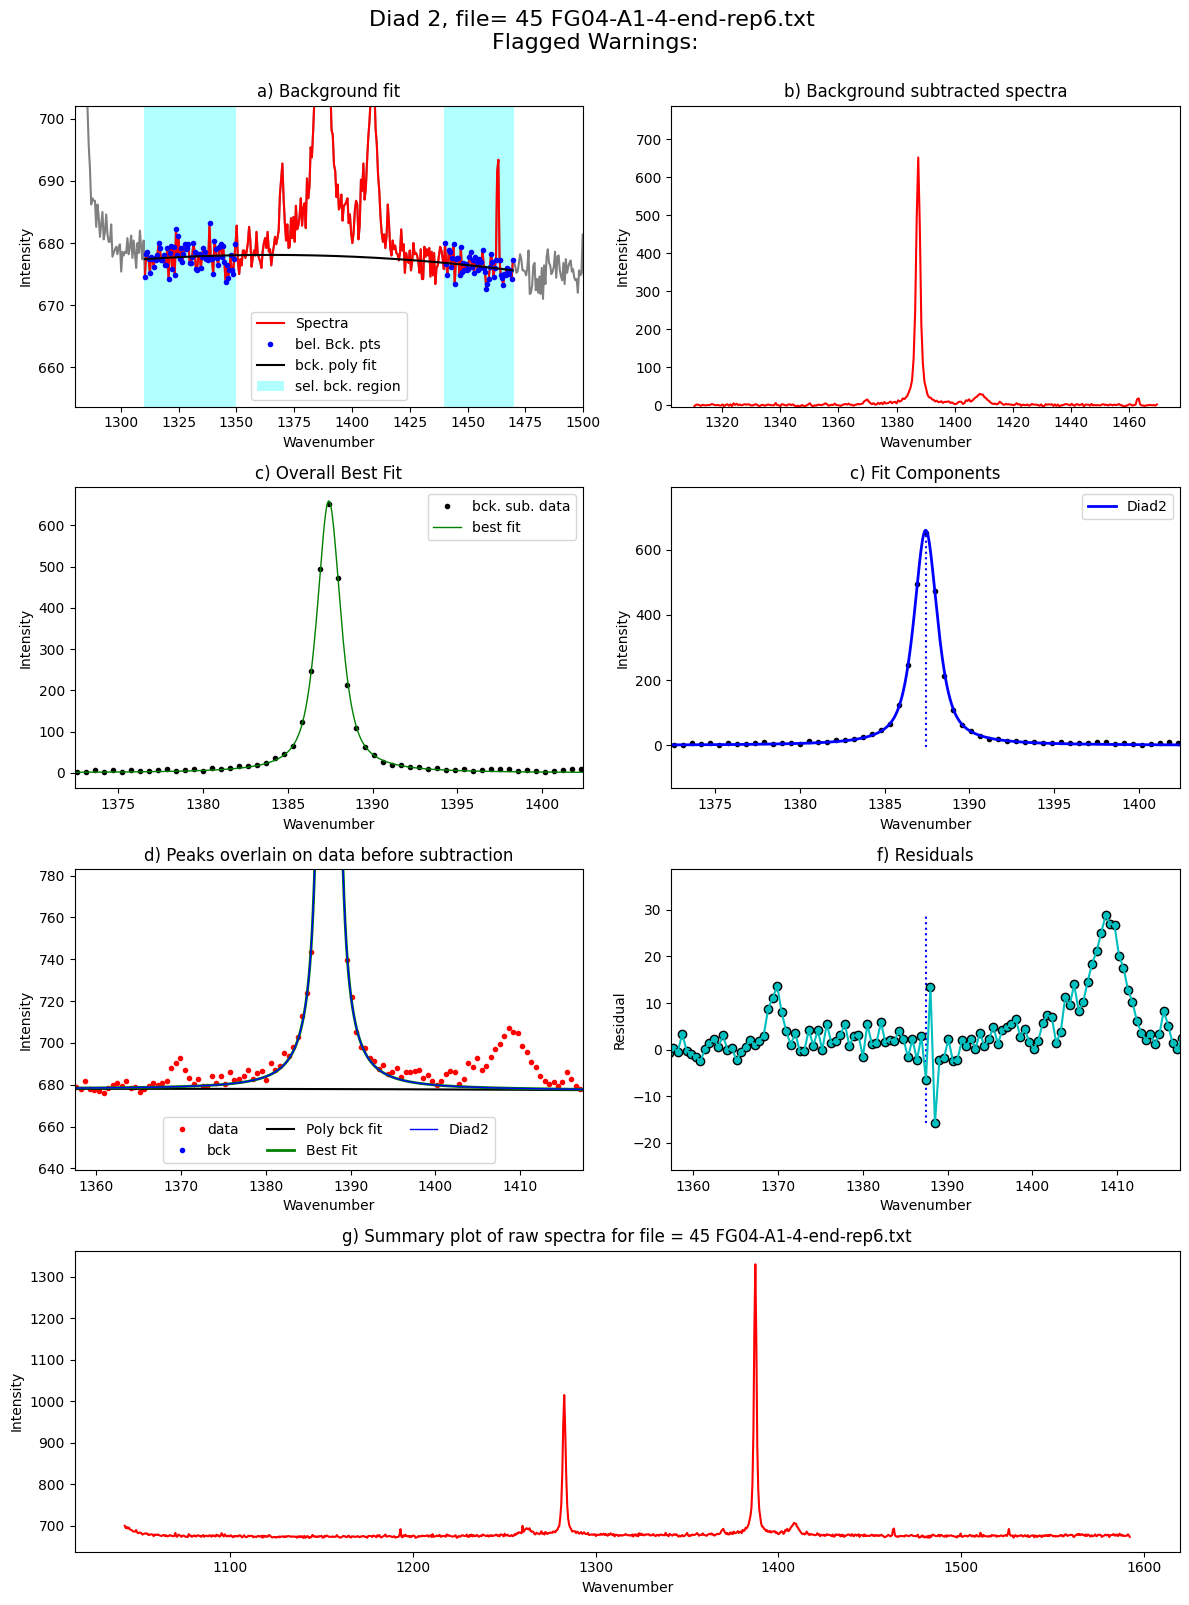

In [47]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [48]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [49]:
combo

filename   Splitting   Split_σ  \
0  FG04-A1-4-start-rep1-mightbetoohot  104.547020  0.007885   
1  FG04-A1-4-start-rep2-mightbetoohot  104.538199  0.008755   
2  FG04-A1-4-start-rep3-mightbetoohot  104.548667  0.008311   
3                  FG04-A1-4-end-rep4  104.560568  0.009582   
4      FG04-A1-4-end-rep5_CRR_DiadFit  104.563803  0.009890   
5                  FG04-A1-4-end-rep6  104.564118  0.010191   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1283.079621        0.007486             452.618401   
1          1283.081167        0.008281             414.090398   
2          1283.077922        0.007867             455.326302   
3          1282.864610        0.007869             369.305903   
4          1282.851716        0.008335             335.403484   
5          1282.858958        0.008312             338.323676   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  ...  \
0       1283.079621       1272.936262           0.966118        3.890612  ...   
1       1283.081167       1171.791145           0.980360        3.813961  ...   
2       1283.077922       1281.899803           0.983224        4.226629  ...   
3       1282.864610       1026.749088           0.970342        3.412268  ...   
4       1282.851716        947.462623           1.004215        3.023470  ...   
5       1282.858958        920.428297           0.953325        2.926244  ...   

   Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  \
0      1.136531      1.069009                  0.263811              0.004269   
1      1.056042      1.055487                  0.109883              0.004735   
2      1.093972      1.081149                  0.184790              0.004319   
3      1.045936      1.035220                  0.089148              0.005255   
4      1.025424      1.013158                  0.051062              0.005988   
5      1.035842      1.048101                  0.068339              0.005636   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.014583      1.011628                   0.023408   
1      1.008163      1.015759                   0.013374   
2      1.014523      1.062958                   0.023511   
3      1.010438      1.007289                   0.016812   
4      1.035565      1.007246                   0.057744   
5      1.051653      1.078078                   0.085494   

   Diad2_Remigi2021_BSF   Diad1_PDF_Model   Diad2_PDF_Model  
0              0.001750  PseudoVoigtModel  PseudoVoigtModel  
1              0.001992  PseudoVoigtModel  PseudoVoigtModel  
2              0.001791  PseudoVoigtModel  PseudoVoigtModel  
3              0.002172  PseudoVoigtModel  PseudoVoigtModel  
4              0.002350  PseudoVoigtModel  PseudoVoigtModel  
5              0.002510  PseudoVoigtModel  PseudoVoigtModel  

[6 rows x 49 columns]

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [50]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()